<center><h1>Linear Regression with Regularization</h1></center>

**<center>Aditya Vallabh</center>**
**<center>IIT2016517</center>**

**Problem**

We are given a housing price dataset. Using various parameters in the datasets we
need to predict the housing price.

- Predict housing price using normal equations method.

- Predict housing price using gradient descent method.

**Requirements:**
- numpy
- pandas
- matplotlib

In [134]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Define cost functions and pre-process data by dropping 'yes/no' columns

In [135]:
def err(yy, y):
    diff = yy - y
    return np.sum(np.power(diff, 2))/(2*len(y))
    # return sum(np.abs(diff)/y)/len(y)

def pre_process(data, cols):
    data = data.drop(cols, axis=1)
    data = (data - data.mean())/data.std()
    # data.loc[:, 'lotsize':] = (data.loc[:, 'lotsize':] - data.loc[:, 'lotsize':].mean())/data.loc[:, 'lotsize':].std()
    return data

<h3>Normal Equation method</h3>

`W = (X.T * X + L)^-1 * (X.T * Y)`

Extend input dimensions to add bias terms


In [136]:
def train(x, y, L=0):
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    Y = np.array(y)

    XX = X.T.dot(X)
    XY = X.T.dot(Y)

    L = L*np.identity(XX.shape[0])
    L[0][0] = 0
    W = np.linalg.inv(XX + L).dot(XY)
    return W

<h3>Gradient Descent Method</h3>

In [137]:
def gradient_descent(x, y, w=None, epochs=1000, learning_rate=.02, L=100):
    errs = []
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    if not w:
        w = np.zeros(X.shape[1])
    N = float(len(y))
    for i in range(epochs):
        y_current = (X.dot(w))
        errs.append(err(y_current, y))
        diff = y_current - y
        Z = (X.T.dot(diff))
        w_gradient = (1/N) * Z
        regularization = (L/N)*w
        regularization[0] = 0
        w -= (learning_rate * (w_gradient + regularization))
    return w, errs

Predict the price given weights and features

In [138]:
def predict(x, W):
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    pred = []
    for t in X:
        pred.append(t.dot(W))
    return np.array(pred)

Read the dataset and pre-process by removing unecessary columns and normalize the data for faster convergence


In [139]:
df = pd.read_csv('dataset.csv', index_col=0)
df = pre_process(df, ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea'])
df.head()
# df = df.sample(frac=1)

,price,lotsize,bedrooms,bathrms,stories,garagepl
1,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
2,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
3,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
4,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
5,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


Perform train - test split given a *split ratio*

In [140]:
def train_test_split(split):
    idx = int(split*len(df))
    train_data, test_data = df.iloc[:idx], df.iloc[idx:]
    # test_data = train_data
    # print(len(train_data), len(test_data))
    x_train = train_data.loc[:, train_data.columns != 'price'].values
    y_train = train_data['price'].values
    x_test = test_data.loc[:, test_data.columns != 'price'].values
    y_test = test_data['price'].values
    return x_train, y_train, x_test, y_test

Given training and testing data, vary **lambda** (regularization parameter) and return the corresponding costs for every lambda

In the function below, we vary lambda from 0 to 500

In [141]:
def analyze(x_train, y_train, x_test, y_test):
    N_r = []
    G_r = []
    L_r = []

    for L in range(0, 500, 10):
        L_r.append(L)
        W = train(x_train, y_train, L=L)
        yy = predict(x_test, W)
        norm_err = err(yy, y_test)
    #     print('Normal Equations Error: {}'.format(norm_err))
        N_r.append(norm_err)

        W2, errs = gradient_descent(x_train, y_train, epochs=100, L=L)
        yy = predict(x_test, W2)
        grad_err = err(yy, y_test)
    #     print('Gradient Descent Error: {}'.format(grad_err))
        G_r.append(grad_err)
    #     print(W2)
    return L_r, N_r, G_r

Plot graphs comparing the performance of Normal Equations and Gradient Descent in `Cost vs Lambda`

In [142]:
def plot_graphs(L_r, N_r, G_r):
    # plt.plot(range(len(errs)), [norm_err]*len(errs), '-g')
    # plt.plot(range(len(errs)), errs, '-r')
    plt.plot(L_r, N_r, '-g', label='Normal Eqns.')
    plt.plot(L_r, G_r, '-r', label='Grad desc.')
    plt.xlabel('Lambda')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid()
    plt.show()

**Observe the effect of lambda without splitting the dataset**

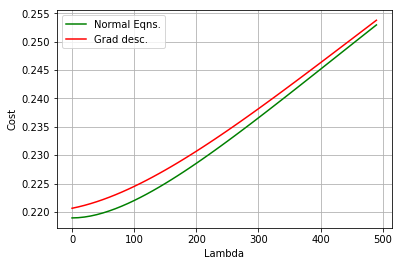

In [143]:
x1, y1, x2, y2 = train_test_split(split=1)
x2, y2 = x1, y1
L_r, N_r, G_r = analyze(x1, y1, x2, y2)
plot_graphs(L_r, N_r, G_r)

**Observe the effect of lambda with a 70% - 30% split**

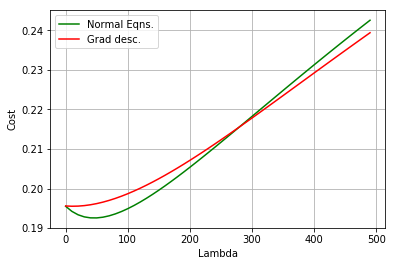

In [144]:
x1, y1, x2, y2 = train_test_split(split=.7)
L_r, N_r, G_r = analyze(x1, y1, x2, y2)
plot_graphs(L_r, N_r, G_r)

<h3>Observations</h3>

<b>We observe that when we don't split the dataset:
    - Normal equations result is always better than Gradient descent
    - Cost is always increasing with increasing lambda

When we split the dataset into a 70% - 30% ratio:    
    - Normal equations result initially improves upto lambda=50 (approx.) and then the cost increases indefinitely
    - For large lambda, gradient descent has better results than normal equation results

<h3>Conclusion</h3>

<b>The given dataset has very few features for overfitting to occur. Hence regularization doesn't play a major role here.
    Also it's possible to get a solution using GD better than normal equations when there's a train-test split